# Assignment Week 6 and 7 - Location Planning

In [14]:
import numpy as np
import pandas as pd
import random
import gurobipy as gp
from gurobipy import *
import matplotlib.pyplot as plt

# Model

In [15]:
model = Model("Road inspectors")

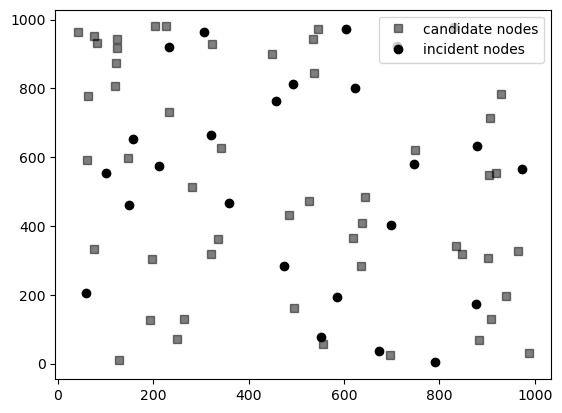

In [16]:
np.random.seed(6)
candidates = np.random.randint(0, 1000, (50, 2))
incidents = np.random.randint(0, 1000, (25, 2))

plt.plot(candidates[:, 0], candidates[:, 1], 'ks', alpha=0.5, label='candidate nodes')
plt.plot(incidents[:, 0], incidents[:, 1], 'ko', label='incident nodes')
plt.legend()

In [17]:
N = np.arange(len(candidates))
K = np.arange(len(incidents))
M = 999999 # Big M
# Parameters
d = np.ones(((len(N), len(K))), dtype=float) * M
for i in range(len(N)):
    for j in range(len(K)):
        d[i, j] = np.sqrt(np.sum((candidates[i, :] - incidents[j, :]) ** 2))

inspector_cap = 5

In [18]:
pair = [(i, j) for i in N for j in K]
x = model.addVars(pair, vtype=GRB.BINARY, name="x")

model.Params.IntegralityFocus=1 
model.update()

Set parameter IntegralityFocus to value 1


In [19]:
model.setObjective(quicksum(d[i, k] * x[i, k] for i in N for k in K),
                   GRB.MINIMIZE)

In [20]:
model.addConstrs(quicksum(x[i, k] for i in N) == 1 for k in K);

In [21]:
model.addConstrs(x[i, k] <= inspector_cap for k in K for i in N);

In [22]:
model.optimize()


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1275 rows, 1250 columns and 2500 nonzeros
Model fingerprint: 0xbaab9ccb
Variable types: 0 continuous, 1250 integer (1250 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+01, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 13524.822258
Presolve removed 1275 rows and 1250 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 2: 2055.34 13524.8 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.055342770056e+03, best bound 2.055342770056e+03, gap 0.0000%


In [23]:
# Print selected facilities
inspectors = []

for i in N:
    for k in K:
        if x[i, k].x == 1:
            inspectors.append(i)
inspectors = np.unique(inspectors)
print('Selected inspectors are nodes '+ str(inspectors))

Selected inspectors are nodes [ 0  1  5  6  7  8  9 10 15 17 21 24 26 28 34 36 42 44]


In [24]:
print(f'Minimum total cost is {model.ObjVal:.2f} km')
print(f'Number of inspectors is {len(inspectors)}')
print(f'Average distance per inspector {model.ObjVal / len(inspectors):.2f} km')

Minimum total cost is 2055.34 km
Number of inspectors is 18
Average distance per inspector 114.19 km


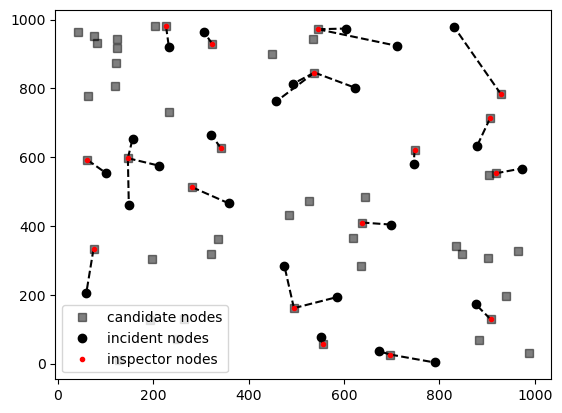

In [25]:
inspector_coordinate = np.zeros((len(inspectors), 2))

for i in range(len(inspectors)):
    inspector_coordinate[i, :] = candidates[inspectors[i], :]
    
for i in N:
    for k in K:
        if x[i, k].x == 1:
            plt.plot((candidates[i, 0], incidents[k, 0]),
                    (candidates[i, 1], incidents[k, 1]),
                    c='black', linestyle='--')

plt.plot(candidates[:, 0], candidates[:, 1], 'ks', alpha=0.5, label='candidate nodes')
plt.plot(incidents[:, 0], incidents[:, 1], 'ko', label='incident nodes')
plt.plot(inspector_coordinate[:, 0], inspector_coordinate[:, 1], 'r.', label='inspector nodes')
plt.legend()